In [2]:
# Import libraries:
import pandas as pd
import numpy as np

In [3]:
#Importing Data
history = pd.read_json('MyData/StreamingHistory0.json')

In [4]:
history.head()

,endTime,artistName,trackName,msPlayed
0,2019-07-22 14:15,Token,Same Difference,0
1,2019-07-22 14:21,Token,Same Difference,294355
2,2019-07-22 14:24,Token,Treehouse,185672
3,2019-07-22 14:26,Token,FBI,168444
4,2019-07-22 14:30,Token,Suitcase and a Passport,188190


#### Some information about the datasets features from the official website:
A list of items (e.g. songs, videos, and podcasts) listened to or watched in the past year, including:

    Date and time of when the stream ended in UTC format (Coordinated Universal Time zone).
    Name of "creator" for each stream (e.g. the artist name if a music track).
    Name of items listened to or watched (e.g. title of music track or name of video). 
    “msPlayed”- Stands for how many mili-seconds the track was listened. 

In [5]:
history.shape

(5702, 4)

In [6]:
history.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [11]:
#Converting Time from UTC into IST:
from datetime import timedelta
history['endTime'] = pd.to_datetime(history['endTime'])
history['localTime'] = history['endTime'] + timedelta(hours=5,minutes = 30)

In [16]:
history.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed               int64
localTime     datetime64[ns]
dtype: object

In [17]:
history.head()

,endTime,artistName,trackName,msPlayed,localTime
0,2019-07-22 14:15:00,Token,Same Difference,0,2019-07-22 19:45:00
1,2019-07-22 14:21:00,Token,Same Difference,294355,2019-07-22 19:51:00
2,2019-07-22 14:24:00,Token,Treehouse,185672,2019-07-22 19:54:00
3,2019-07-22 14:26:00,Token,FBI,168444,2019-07-22 19:56:00
4,2019-07-22 14:30:00,Token,Suitcase and a Passport,188190,2019-07-22 20:00:00


In [18]:
#Splitting the endTime column into Date and Time columns
history['Dates'] = pd.to_datetime(history['localTime']).dt.date
history['Time'] = pd.to_datetime(history['localTime']).dt.time

In [20]:
history.drop(columns = ['endTime','localTime'])

,artistName,trackName,msPlayed,Dates,Time
0,Token,Same Difference,0,2019-07-22,19:45:00
1,Token,Same Difference,294355,2019-07-22,19:51:00
2,Token,Treehouse,185672,2019-07-22,19:54:00
3,Token,FBI,168444,2019-07-22,19:56:00
4,Token,Suitcase and a Passport,188190,2019-07-22,20:00:00
...,...,...,...,...,...
5697,Token,FBI,2508,2020-07-08,06:45:00
5698,Token,And You (ft. IDK & Bas),1467,2020-07-08,06:45:00
5699,Token,Treehouse,1371,2020-07-08,06:45:00
5700,Token,Suitcase and a Passport,920,2020-07-08,06:46:00


In [26]:
history['msPlayed'].describe()

count      5702.000000
mean     107986.593827
std      107419.945565
min           0.000000
25%        3169.250000
50%       78337.000000
75%      204615.000000
max      926893.000000
Name: msPlayed, dtype: float64

In [32]:
#Removing songs played lesser than 15 seconds(15000 milli-seconds).(assuming they were not heard for a substantial duration)
history[history['msPlayed'] <= 15000] #2210 such instances.
#Accepting songs played more than 15000 milli-seconds.
history = history[history['msPlayed'] > 15000]
history.shape

(3492, 7)

In [65]:
#10 Most played Artists and most played Songs.
print('Top 10 most heard artists:')
print(history['artistName'].value_counts().head(10))
print('\nTop 10 most played songs:')
print(history['trackName'].value_counts().head(10))

Top 10 most heard artists:
The Weeknd         684
Akon               305
Denzel Curry       219
Token              192
Eminem             191
NAV                151
6ix9ine             98
Bruce Faulconer     98
Drake               92
Ne-Yo               60
Name: artistName, dtype: int64

Top 10 most played songs:
Crew Love                                         33
Heartless                                         31
Weather the Storm (feat. Meek Mill & Lil Baby)    27
Love In The Sky                                   21
Professional                                      20
You                                               18
Unaccommodating (feat. Young M.A)                 18
After Hours                                       17
The Town                                          17
Blinding Lights                                   17
Name: trackName, dtype: int64


pandas.core.series.Series

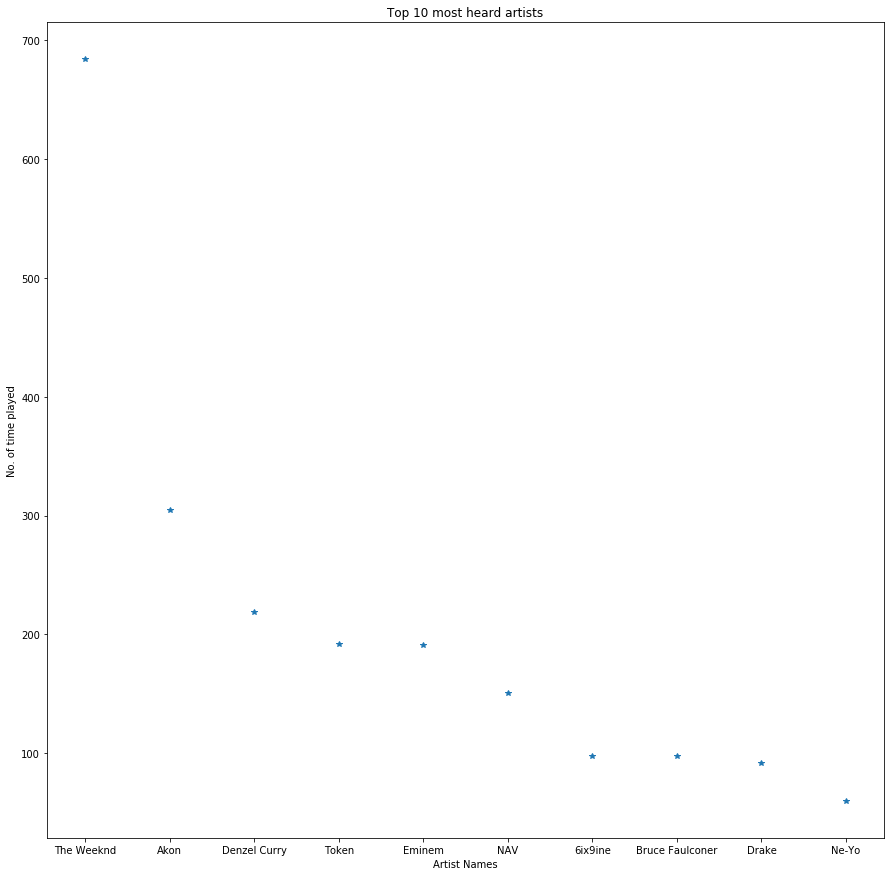

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(history['artistName'].value_counts().head(10),'*')
plt.xlabel('Artist Names')
plt.ylabel('No. of time played')
plt.title('Top 10 most heard artists')
temp = history['artistName'].value_counts().head(10)


In [21]:
#Importing SpotifyFeatures.csv
spotifyFeatures = pd.read_csv('SpotifyFeatures.csv')

In [22]:
print(spotifyFeatures.shape)
spotifyFeatures.head()

(232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
